### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
os.getcwd()

'C:\\Users\\jagad\\OneDrive\\Documents\\Insofe\\PHD\\PHD -ML\\PHD Preprocessing'

### Reading the  Train Datasets

In [3]:
beneficiary_data = pd.read_csv("C:\\Users\\jagad\\OneDrive\\Documents\\Insofe\\PHD\\PHD -ML\\Train_Beneficiarydata-1542865627584.csv")
inpatient_data = pd.read_csv("C:\\Users\\jagad\\OneDrive\\Documents\\Insofe\\PHD\\PHD -ML\\Train_Inpatientdata-1542865627584.csv")
outpatient_data = pd.read_csv("C:\\Users\\jagad\\OneDrive\\Documents\\Insofe\\PHD\\PHD -ML\\Train_Outpatientdata-1542865627584.csv")
train_data = pd.read_csv("C:\\Users\\jagad\\OneDrive\\Documents\\Insofe\\PHD\\PHD -ML\\Train-1542865627584.csv")

### Visualizing the datasets

In [4]:
beneficiary_data.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [5]:
inpatient_data.sample(5)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
25283,BENE103765,CLM46226,2009-04-09,2009-04-12,PRV52019,5000,PHY368469,PHY410563,PHY384587,2009-04-09,...,79092,2724,2800,NaN,4516.0,NaN,NaN,NaN,NaN,NaN
14530,BENE64535,CLM35702,2009-01-27,2009-02-04,PRV52065,38000,PHY349423,PHY366918,NaN,2009-01-27,...,V140,49121,42653,NaN,3794.0,4019.0,NaN,NaN,NaN,NaN
36604,BENE145294,CLM74556,2009-11-03,2009-11-04,PRV52064,2000,PHY379255,NaN,NaN,2009-11-03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19360,BENE81905,CLM53564,2009-05-31,2009-06-05,PRV53790,0,PHY315143,NaN,NaN,2009-05-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14249,BENE63433,CLM55246,2009-06-12,2009-06-15,PRV56102,12000,PHY427024,PHY427165,NaN,2009-06-12,...,5853,V4573,4019,NaN,8151.0,NaN,NaN,NaN,NaN,NaN


In [6]:
outpatient_data.sample(5)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
211764,BENE71816,CLM739956,2009-12-22,2009-12-22,PRV55185,30,PHY431014,NaN,NaN,71892,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
372140,BENE117586,CLM720286,2009-12-08,2009-12-08,PRV54668,10,PHY394440,NaN,PHY394440,34662,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
281789,BENE91819,CLM646580,2009-10-24,2009-10-24,PRV54966,200,PHY423244,NaN,PHY425443,7840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
23065,BENE17543,CLM356747,2009-05-13,2009-05-13,PRV53887,200,PHY389434,NaN,NaN,591,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
24244,BENE17897,CLM165809,2009-01-30,2009-01-30,PRV57306,300,PHY317416,NaN,NaN,7212,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,NaN


In [7]:
train_data.sample(5)

,Provider,PotentialFraud
4841,PRV57080,No
1124,PRV52404,No
1628,PRV53029,No
3515,PRV55412,No
563,PRV51707,No


In [8]:
beneficiary_data.dtypes

BeneID                             object
DOB                                object
DOD                                object
Gender                              int64
Race                                int64
RenalDiseaseIndicator              object
State                               int64
County                              int64
NoOfMonths_PartACov                 int64
NoOfMonths_PartBCov                 int64
ChronicCond_Alzheimer               int64
ChronicCond_Heartfailure            int64
ChronicCond_KidneyDisease           int64
ChronicCond_Cancer                  int64
ChronicCond_ObstrPulmonary          int64
ChronicCond_Depression              int64
ChronicCond_Diabetes                int64
ChronicCond_IschemicHeart           int64
ChronicCond_Osteoporasis            int64
ChronicCond_rheumatoidarthritis     int64
ChronicCond_stroke                  int64
IPAnnualReimbursementAmt            int64
IPAnnualDeductibleAmt               int64
OPAnnualReimbursementAmt          

In [9]:
inpatient_data.dtypes

BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed      int64
AttendingPhysician         object
OperatingPhysician         object
OtherPhysician             object
AdmissionDt                object
ClmAdmitDiagnosisCode      object
DeductibleAmtPaid         float64
DischargeDt                object
DiagnosisGroupCode         object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
ClmDiagnosisCode_9         object
ClmDiagnosisCode_10        object
ClmProcedureCode_1        float64
ClmProcedureCode_2        float64
ClmProcedureCode_3        float64
ClmProcedureCode_4        float64
ClmProcedureCode_5        float64
ClmProcedureCo

In [10]:
outpatient_data.dtypes

BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed      int64
AttendingPhysician         object
OperatingPhysician         object
OtherPhysician             object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
ClmDiagnosisCode_9         object
ClmDiagnosisCode_10        object
ClmProcedureCode_1        float64
ClmProcedureCode_2        float64
ClmProcedureCode_3        float64
ClmProcedureCode_4        float64
ClmProcedureCode_5        float64
ClmProcedureCode_6        float64
DeductibleAmtPaid           int64
ClmAdmitDiagnosisCode      object
dtype: object

In [11]:
train_data.dtypes

Provider          object
PotentialFraud    object
dtype: object

In [12]:
print(inpatient_data.shape)
print(outpatient_data.shape)
print(train_data.shape)
print(beneficiary_data.shape)

(40474, 30)
(517737, 27)
(5410, 2)
(138556, 25)


### Merging Of Datasets

In [13]:
mergeddata1 = inpatient_data.append(outpatient_data,ignore_index=False)

In [14]:
mergeddata1.shape

(558211, 30)

In [15]:
mergeddata2=pd.merge(mergeddata1,beneficiary_data, how='left', on=['BeneID'])

In [16]:
mergeddata2.shape

(558211, 54)

In [17]:
finaltraindata=pd.merge(mergeddata2,train_data, how='inner',on=['Provider'])

In [18]:
finaltraindata.shape

(558211, 55)

In [19]:
finaltraindata.describe()

,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,InscClaimAmtReimbursed,Gender,Race,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
count,23310.000000,5490.000000,969.000000,118.000000,9.000000,0.0,557312.000000,558211.000000,558211.000000,558211.000000,...,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000
mean,5896.154612,4106.358106,4221.123839,4070.262712,5269.444444,NaN,78.421085,997.012133,1.578838,1.255011,...,1.565193,1.294605,1.240735,1.682353,1.688829,1.898280,5227.971466,568.756807,2278.225348,649.698745
std,3050.489933,2031.640878,2281.849885,2037.626990,2780.071632,NaN,274.016812,3821.534891,0.493746,0.717437,...,0.495732,0.455866,0.427530,0.465562,0.462973,0.302279,11786.274732,1179.172616,3881.846386,1002.020811
min,11.000000,42.000000,42.000000,42.000000,2724.000000,NaN,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-8000.000000,0.000000,-70.000000,0.000000
25%,3848.000000,2724.000000,2724.000000,2754.250000,4139.000000,NaN,0.000000,40.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,460.000000,120.000000
50%,5363.000000,4019.000000,4019.000000,4019.000000,4139.000000,NaN,0.000000,80.000000,2.000000,1.000000,...,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,1170.000000,340.000000
75%,8669.000000,4439.000000,5185.000000,4439.000000,5185.000000,NaN,0.000000,300.000000,2.000000,1.000000,...,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,6000.000000,1068.000000,2590.000000,790.000000
max,9999.000000,9999.000000,9999.000000,9986.000000,9982.000000,NaN,1068.000000,125000.000000,2.000000,5.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,161470.000000,38272.000000,102960.000000,13840.000000


In [20]:
finaltraindata.dtypes

AdmissionDt                         object
AttendingPhysician                  object
BeneID                              object
ClaimEndDt                          object
ClaimID                             object
ClaimStartDt                        object
ClmAdmitDiagnosisCode               object
ClmDiagnosisCode_1                  object
ClmDiagnosisCode_10                 object
ClmDiagnosisCode_2                  object
ClmDiagnosisCode_3                  object
ClmDiagnosisCode_4                  object
ClmDiagnosisCode_5                  object
ClmDiagnosisCode_6                  object
ClmDiagnosisCode_7                  object
ClmDiagnosisCode_8                  object
ClmDiagnosisCode_9                  object
ClmProcedureCode_1                 float64
ClmProcedureCode_2                 float64
ClmProcedureCode_3                 float64
ClmProcedureCode_4                 float64
ClmProcedureCode_5                 float64
ClmProcedureCode_6                 float64
DeductibleA

### Feature Engineering

#### Extracting No.Of ClaimDays

In [21]:
from datetime import datetime
date_format = "%d/%m/%Y"
from datetime import date

In [22]:
finaltraindata.ClaimStartDt = pd.to_datetime(finaltraindata.ClaimStartDt)
finaltraindata.ClaimEndDt = pd.to_datetime(finaltraindata.ClaimEndDt)

In [23]:
finaltraindata['No_of_claimdays']=finaltraindata['ClaimEndDt']-finaltraindata['ClaimStartDt']

In [24]:
finaltraindata['No_of_claimdays'].head(5)

0    6 days
1   12 days
2   18 days
3    4 days
4    4 days
Name: No_of_claimdays, dtype: timedelta64[ns]

#### Extracting Days in Hospital

In [25]:
finaltraindata.AdmissionDt = pd.to_datetime(finaltraindata.AdmissionDt)
finaltraindata.DischargeDt = pd.to_datetime(finaltraindata.DischargeDt)

In [26]:
finaltraindata['Days_in_Hospital']=finaltraindata['DischargeDt']-finaltraindata['AdmissionDt']

In [27]:
finaltraindata['Days_in_Hospital'].head(5)

0    6 days
1   12 days
2   18 days
3    4 days
4    4 days
Name: Days_in_Hospital, dtype: timedelta64[ns]

In [28]:
finaltraindata['Days_in_Hospital'].equals(finaltraindata['No_of_claimdays'])

False

In [29]:
finaltraindata['Days_in_Hospital'].sample(5)

474371   NaT
143504   NaT
544572   NaT
256997   NaT
556099   NaT
Name: Days_in_Hospital, dtype: timedelta64[ns]

In [30]:
finaltraindata['Days_in_Hospital'].isnull()

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
558181     True
558182     True
558183     True
558184     True
558185     True
558186     True
558187     True
558188     True
558189     True
558190     True
558191     True
558192     True
558193     True
558194     True
558195     True
558196     True
558197     True
558198     True
558199     True
558200     True
558201     True
558202     True
558203     True
558204     True
558205     True
558206     True
558207     True
558208     True
558209     True
558210     True
Name: Days_in_Hospital, 

In [31]:
finaltraindata['No_of_claimdays'].sample(5)

216222   0 days
378314   0 days
233600   0 days
66998    2 days
508924   0 days
Name: No_of_claimdays, dtype: timedelta64[ns]

#### Extracting Age 

In [32]:
finaltraindata.DOB = pd.to_datetime(finaltraindata.DOB)
finaltraindata['DOB'].head(5)

0   1943-01-01
1   1913-12-01
2   1922-10-01
3   1930-07-01
4   1925-09-01
Name: DOB, dtype: datetime64[ns]

In [33]:
finaltraindata['DOD'].count()

4131

##### filling remaining values with a date to calculate age 

In [34]:
finaltraindata['DOD']=finaltraindata['DOD'].fillna('2009-12-31')

In [35]:
finaltraindata['DOD'] = pd.to_datetime(finaltraindata.DOD)

In [36]:
finaltraindata['Age'] = finaltraindata['DOD']-finaltraindata['DOB'] 
finaltraindata['Age'] = ((finaltraindata['DOD'] - finaltraindata['DOB'])/365).dt.days 

#### Removing the Columns after extracting the features from them

In [37]:
finaltraindata=finaltraindata.drop(['ClaimStartDt','ClaimEndDt','AdmissionDt','DischargeDt','DOB','DOD'],axis=1)

In [38]:
finaltraindata.dtypes

AttendingPhysician                          object
BeneID                                      object
ClaimID                                     object
ClmAdmitDiagnosisCode                       object
ClmDiagnosisCode_1                          object
ClmDiagnosisCode_10                         object
ClmDiagnosisCode_2                          object
ClmDiagnosisCode_3                          object
ClmDiagnosisCode_4                          object
ClmDiagnosisCode_5                          object
ClmDiagnosisCode_6                          object
ClmDiagnosisCode_7                          object
ClmDiagnosisCode_8                          object
ClmDiagnosisCode_9                          object
ClmProcedureCode_1                         float64
ClmProcedureCode_2                         float64
ClmProcedureCode_3                         float64
ClmProcedureCode_4                         float64
ClmProcedureCode_5                         float64
ClmProcedureCode_6             

### Binning of Diagnostic Codes

In [39]:
finaltraindata['DiagnosisGroupCode'].replace('OTH',173.4,inplace=True)
finaltraindata['DiagnosisGroupCode'].replace(np.nan,0,inplace=True)

In [40]:
finaltraindata['DiagnosisGroupCode']= finaltraindata['DiagnosisGroupCode'].astype('category')
finaltraindata['DiagnosisGroupCode']= finaltraindata['DiagnosisGroupCode'].astype('int')

In [41]:
bins = [0,139,239,279,289,319,389,459,519,579,629,679,709,739,759,779,799,999]
labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
finaltraindata['BinnedDiagnosisGroupCode'] = pd.cut(finaltraindata['DiagnosisGroupCode'], bins=bins, labels=labels)

In [42]:
finaltraindata['BinnedDiagnosisGroupCode'].isnull().mean()

0.9277334198000398

In [43]:
finaltraindata['BinnedDiagnosisGroupCode'].replace(np.nan,0,inplace=True)

In [44]:
finaltraindata=finaltraindata.drop(['DiagnosisGroupCode'],axis=1)

In [45]:
traincd = finaltraindata.loc[:, 'ClmAdmitDiagnosisCode':'ClmDiagnosisCode_9']

In [46]:
cols = ('ClmAdmitDiagnosisCode','ClmDiagnosisCode_1','ClmDiagnosisCode_2','ClmDiagnosisCode_3','ClmDiagnosisCode_4',
        'ClmDiagnosisCode_5','ClmDiagnosisCode_6','ClmDiagnosisCode_7','ClmDiagnosisCode_8','ClmDiagnosisCode_9',
        'ClmDiagnosisCode_10')

In [47]:
for i in cols:
    traincd[i] = traincd[i].str.replace('V','')
    traincd[i] = traincd[i].str.replace('E','')
    traincd[i] = traincd[i].fillna(0)
    traincd[i] = traincd[i].astype(str).str[0:3]
    traincd[i] = traincd[i].astype('int')

In [48]:
traincd['BinnedClmAdmitDiagnosisCode'] = pd.cut(traincd['ClmAdmitDiagnosisCode'], bins=bins, labels=labels)
traincd['BinnedClmDiagnosisCode_1'] =pd.cut(traincd['ClmDiagnosisCode_1'], bins=bins, labels=labels)
traincd['BinnedClmDiagnosisCode_2'] =pd.cut(traincd['ClmDiagnosisCode_2'], bins=bins, labels=labels)
traincd['BinnedClmDiagnosisCode_3'] =pd.cut(traincd['ClmDiagnosisCode_3'], bins=bins, labels=labels)
traincd['BinnedClmDiagnosisCode_4'] =pd.cut(traincd['ClmDiagnosisCode_4'], bins=bins, labels=labels)
traincd['BinnedClmDiagnosisCode_5'] =pd.cut(traincd['ClmDiagnosisCode_5'], bins=bins, labels=labels)
traincd['BinnedClmDiagnosisCode_6'] =pd.cut(traincd['ClmDiagnosisCode_6'], bins=bins, labels=labels)
traincd['BinnedClmDiagnosisCode_7'] =pd.cut(traincd['ClmDiagnosisCode_7'], bins=bins, labels=labels)
traincd['BinnedClmDiagnosisCode_8'] =pd.cut(traincd['ClmDiagnosisCode_8'], bins=bins, labels=labels)
traincd['BinnedClmDiagnosisCode_9'] =pd.cut(traincd['ClmDiagnosisCode_9'], bins=bins, labels=labels)
traincd['BinnedClmDiagnosisCode_10'] =pd.cut(traincd['ClmDiagnosisCode_10'], bins=bins, labels=labels)

In [49]:
traincd['BinnedClmAdmitDiagnosisCode'].replace(np.nan,0,inplace=True)
traincd['BinnedClmDiagnosisCode_1'].replace(np.nan,0,inplace=True)
traincd['BinnedClmDiagnosisCode_2'].replace(np.nan,0,inplace=True)
traincd['BinnedClmDiagnosisCode_3'].replace(np.nan,0,inplace=True)
traincd['BinnedClmDiagnosisCode_4'].replace(np.nan,0,inplace=True)
traincd['BinnedClmDiagnosisCode_5'].replace(np.nan,0,inplace=True)
traincd['BinnedClmDiagnosisCode_6'].replace(np.nan,0,inplace=True)
traincd['BinnedClmDiagnosisCode_7'].replace(np.nan,0,inplace=True)
traincd['BinnedClmDiagnosisCode_8'].replace(np.nan,0,inplace=True)
traincd['BinnedClmDiagnosisCode_9'].replace(np.nan,0,inplace=True)
traincd['BinnedClmDiagnosisCode_10'].replace(np.nan,0,inplace=True)

In [50]:
traincd1 = traincd.drop(['ClmAdmitDiagnosisCode','ClmDiagnosisCode_1','ClmDiagnosisCode_2','ClmDiagnosisCode_3',
                         'ClmDiagnosisCode_4','ClmDiagnosisCode_5','ClmDiagnosisCode_6','ClmDiagnosisCode_7',
                         'ClmDiagnosisCode_8','ClmDiagnosisCode_9','ClmDiagnosisCode_10'],axis=1)

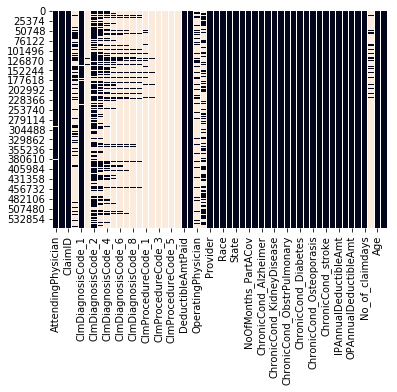

In [51]:
sns.heatmap(finaltraindata.isnull(),cbar=False)

### Dropping the Attributes which has na values and ID's

In [52]:
traindata2 = finaltraindata.drop(['AttendingPhysician','ClmAdmitDiagnosisCode','ClmProcedureCode_1','ClmProcedureCode_2',
                              'ClmProcedureCode_3','ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6',
                              'OperatingPhysician','OtherPhysician','ClmDiagnosisCode_3','ClmDiagnosisCode_4',
                              'ClmDiagnosisCode_5','ClmDiagnosisCode_6','ClmDiagnosisCode_7','ClmDiagnosisCode_8',
                              'ClmDiagnosisCode_9','ClmDiagnosisCode_10','BeneID','ClaimID','ClmDiagnosisCode_1',
                              'ClmDiagnosisCode_2',],axis=1)

In [53]:
finaltraindata = pd.concat([traindata2,traincd1],axis=1)

### Type Conversion

In [54]:
finaltraindata['DeductibleAmtPaid']= finaltraindata['DeductibleAmtPaid'].fillna(finaltraindata['DeductibleAmtPaid'].mean())

In [55]:
finaltraindata.Days_in_Hospital = finaltraindata.Days_in_Hospital.astype('int64')
finaltraindata.No_of_claimdays= finaltraindata.No_of_claimdays.astype('int64')
finaltraindata.DeductibleAmtPaid = finaltraindata.DeductibleAmtPaid.astype('int64')

In [56]:
catcol = ('Race','Gender','RenalDiseaseIndicator','Provider','State','County','ChronicCond_Alzheimer',
          'ChronicCond_Heartfailure','ChronicCond_KidneyDisease','ChronicCond_Cancer','ChronicCond_ObstrPulmonary',
          'ChronicCond_Depression','ChronicCond_Diabetes','ChronicCond_IschemicHeart','ChronicCond_Osteoporasis',
          'ChronicCond_rheumatoidarthritis','ChronicCond_stroke','PotentialFraud','BinnedDiagnosisGroupCode',
          'BinnedClmAdmitDiagnosisCode','BinnedClmDiagnosisCode_1','BinnedClmDiagnosisCode_2','BinnedClmDiagnosisCode_3',
          'BinnedClmDiagnosisCode_4','BinnedClmDiagnosisCode_5','BinnedClmDiagnosisCode_6','BinnedClmDiagnosisCode_7',
          'BinnedClmDiagnosisCode_8','BinnedClmDiagnosisCode_8','BinnedClmDiagnosisCode_9','BinnedClmDiagnosisCode_10')

In [57]:
for i in catcol:
    finaltraindata[i] = finaltraindata[i].astype('category')

In [58]:
finaltraindata.dtypes

DeductibleAmtPaid                     int64
InscClaimAmtReimbursed                int64
Provider                           category
Gender                             category
Race                               category
RenalDiseaseIndicator              category
State                              category
County                             category
NoOfMonths_PartACov                   int64
NoOfMonths_PartBCov                   int64
ChronicCond_Alzheimer              category
ChronicCond_Heartfailure           category
ChronicCond_KidneyDisease          category
ChronicCond_Cancer                 category
ChronicCond_ObstrPulmonary         category
ChronicCond_Depression             category
ChronicCond_Diabetes               category
ChronicCond_IschemicHeart          category
ChronicCond_Osteoporasis           category
ChronicCond_rheumatoidarthritis    category
ChronicCond_stroke                 category
IPAnnualReimbursementAmt              int64
IPAnnualDeductibleAmt           

In [59]:
finaltraindata.isnull().mean()

DeductibleAmtPaid                  0.0
InscClaimAmtReimbursed             0.0
Provider                           0.0
Gender                             0.0
Race                               0.0
RenalDiseaseIndicator              0.0
State                              0.0
County                             0.0
NoOfMonths_PartACov                0.0
NoOfMonths_PartBCov                0.0
ChronicCond_Alzheimer              0.0
ChronicCond_Heartfailure           0.0
ChronicCond_KidneyDisease          0.0
ChronicCond_Cancer                 0.0
ChronicCond_ObstrPulmonary         0.0
ChronicCond_Depression             0.0
ChronicCond_Diabetes               0.0
ChronicCond_IschemicHeart          0.0
ChronicCond_Osteoporasis           0.0
ChronicCond_rheumatoidarthritis    0.0
ChronicCond_stroke                 0.0
IPAnnualReimbursementAmt           0.0
IPAnnualDeductibleAmt              0.0
OPAnnualReimbursementAmt           0.0
OPAnnualDeductibleAmt              0.0
PotentialFraud           

In [60]:
finaltraindata.sample(5).T

,154542,528760,413949,162808,307660
DeductibleAmtPaid,0,0,0,0,0
InscClaimAmtReimbursed,800,2000,800,40,70
Provider,PRV52845,PRV57000,PRV53702,PRV52130,PRV54387
Gender,2,1,2,1,1
Race,1,1,2,1,1
RenalDiseaseIndicator,Y,0,0,0,0
State,15,45,21,10,26
County,740,310,20,160,470
NoOfMonths_PartACov,12,12,12,12,12
NoOfMonths_PartBCov,12,12,12,12,12


### Exploratory Data Analysis

In [61]:
finaltraindata['PotentialFraud'].value_counts()

No     345415
Yes    212796
Name: PotentialFraud, dtype: int64

Text(0,0.5,'No. of Claims')

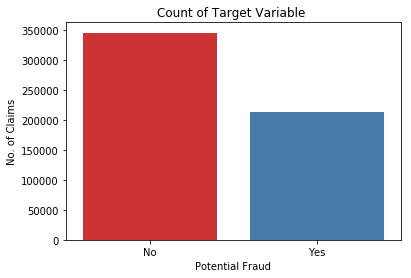

In [62]:
sns.countplot(x='PotentialFraud',data=finaltraindata,palette='Set1')
plt.title("Count of Target Variable ")
plt.xlabel('Potential Fraud')
plt.ylabel('No. of Claims')

### We can see that total no. of FRAUD claims are significant and accounts upto 40% of total claims

Text(0,0.5,'No. of People')

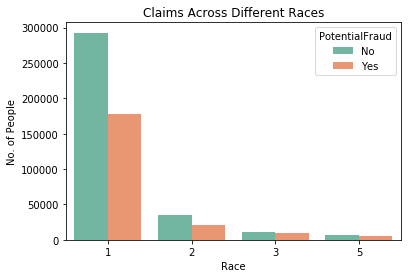

In [63]:
sns.countplot(x="Race",hue="PotentialFraud",palette='Set2',data=finaltraindata)
plt.title("Claims Across Different Races")
plt.xlabel('Race')
plt.ylabel('No. of People')

### Claims belonging to Race 3 having high probality of being Fraud

Text(0.5,1,'Distribution of Beneficiaries among Different Age Groups')

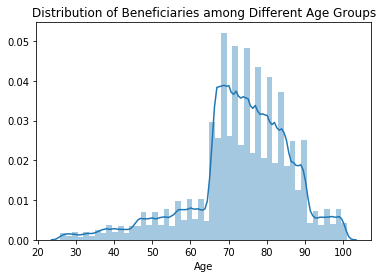

In [64]:
sns.distplot(finaltraindata['Age'])
plt.title('Distribution of Beneficiaries among Different Age Groups')

### Insurance Claims are mostly taken from the age group of 65-90

Text(0.5,1,'Insurance Amount Reimbursed w.r.t Gender')

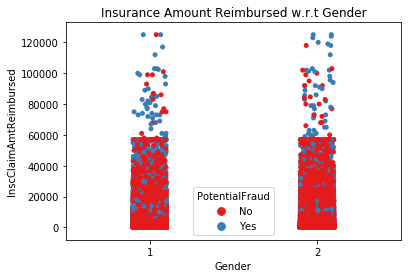

In [65]:
sns.stripplot(x="Gender", y="InscClaimAmtReimbursed", data=finaltraindata,jitter=True,hue='PotentialFraud',palette='Set1')
plt.title('Insurance Amount Reimbursed w.r.t Gender')

### Insurance Fraud is seen in both the Gender 

### And if the Amount to be Reimbursed greater than 60000 for a claim, It has higher probability of Being a Fraud 

Text(0.5,1,'Claims Across States')

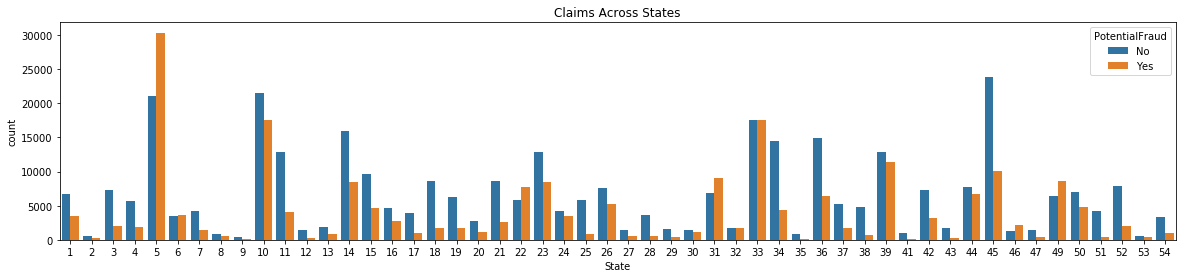

In [66]:
plt.figure(figsize=(20,4))
sns.countplot(x='State',hue="PotentialFraud",data=finaltraindata)
plt.title('Claims Across States')

### Claims in State 5 & 33 are having higher probability of being Fraud

Text(0.5,1,'Claims w.r.t IP annual reimbursement amount')

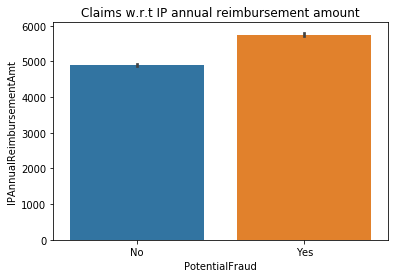

In [67]:
from numpy import median,mean
sns.barplot(x="PotentialFraud", y="IPAnnualReimbursementAmt", data=finaltraindata, estimator=mean)
plt.title('Claims w.r.t IP annual reimbursement amount')

### If the Annual Reimbursement Amount for a provider is greater than 50000   the  claims of the respective provider seems to be Fraud 

### Reading the Test datasets

In [68]:
beneficiary_test = pd.read_csv("C:\\Users\\jagad\\OneDrive\\Documents\\Insofe\\PHD\\PHD -ML\\Test_Beneficiarydata-1542969243754.csv")
inpatient_test = pd.read_csv("C:\\Users\\jagad\\OneDrive\\Documents\\Insofe\\PHD\\PHD -ML\\Test_Inpatientdata-1542969243754.csv")
outpatient_test = pd.read_csv("C:\\Users\\jagad\\OneDrive\\Documents\\Insofe\\PHD\\PHD -ML\\Test_Outpatientdata-1542969243754.csv")
testdata = pd.read_csv("C:\\Users\\jagad\\OneDrive\\Documents\\Insofe\\PHD\\PHD -ML\\Test-1542969243754.csv")

In [69]:
print(inpatient_test.shape)
print(outpatient_test.shape)
print(testdata.shape)
print(beneficiary_test.shape)

(9551, 30)
(125841, 27)
(1353, 1)
(63968, 25)


### Merging of Test Datasets

In [70]:
testmergeddata1 = inpatient_test.append(outpatient_test,ignore_index=False)

In [71]:
testmergeddata2=pd.merge(testmergeddata1,beneficiary_test, how='left', on=['BeneID'])

In [72]:
finaltestdata=pd.merge(testmergeddata2,testdata, how='inner',on=['Provider'])

In [73]:
finaltestdata.shape

(135392, 54)

In [74]:
finaltestdata.dtypes

AdmissionDt                         object
AttendingPhysician                  object
BeneID                              object
ClaimEndDt                          object
ClaimID                             object
ClaimStartDt                        object
ClmAdmitDiagnosisCode               object
ClmDiagnosisCode_1                  object
ClmDiagnosisCode_10                 object
ClmDiagnosisCode_2                  object
ClmDiagnosisCode_3                  object
ClmDiagnosisCode_4                  object
ClmDiagnosisCode_5                  object
ClmDiagnosisCode_6                  object
ClmDiagnosisCode_7                  object
ClmDiagnosisCode_8                  object
ClmDiagnosisCode_9                  object
ClmProcedureCode_1                 float64
ClmProcedureCode_2                 float64
ClmProcedureCode_3                 float64
ClmProcedureCode_4                 float64
ClmProcedureCode_5                 float64
ClmProcedureCode_6                 float64
DeductibleA

In [75]:
finaltestdata.describe()

,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,InscClaimAmtReimbursed,Gender,Race,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
count,5467.000000,1263.000000,225.000000,29.000000,2.000000,0.0,135196.000000,135392.000000,135392.000000,135392.000000,...,135392.000000,135392.000000,135392.000000,135392.000000,135392.000000,135392.000000,135392.000000,135392.000000,135392.000000,135392.000000
mean,5905.430766,4138.790182,4182.213333,4509.931034,7055.500000,NaN,76.499194,981.307906,1.576231,1.240605,...,1.567463,1.291745,1.240383,1.683637,1.689923,1.895422,5271.108559,575.083978,2277.197988,645.259572
std,3057.976988,2042.016095,2165.057828,2571.379659,4124.553855,NaN,270.779562,3788.177532,0.494157,0.695578,...,0.495430,0.454567,0.427318,0.465058,0.462527,0.306010,11746.248324,1211.898840,3985.942527,997.355872
min,14.000000,42.000000,185.000000,260.000000,4139.000000,NaN,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1000.000000,0.000000,-60.000000,0.000000
25%,3891.000000,2749.000000,2724.000000,3320.000000,5597.250000,NaN,0.000000,40.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,470.000000,120.000000
50%,5369.000000,4019.000000,4019.000000,4263.000000,7055.500000,NaN,0.000000,80.000000,2.000000,1.000000,...,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,1170.000000,340.000000
75%,8741.000000,4439.000000,5121.000000,5781.000000,8513.750000,NaN,0.000000,300.000000,2.000000,1.000000,...,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,6000.000000,1068.000000,2560.000000,790.000000
max,9999.000000,9998.000000,9984.000000,9971.000000,9972.000000,NaN,1068.000000,125000.000000,2.000000,5.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,155600.000000,38272.000000,97510.000000,13840.000000


### Feature Engineering 

##### Applying the same steps applied for traindata

In [76]:
from datetime import datetime
date_format = "%d/%m/%Y"
from datetime import date

In [77]:
finaltestdata.ClaimStartDt = pd.to_datetime(finaltestdata.ClaimStartDt)
finaltestdata.ClaimEndDt = pd.to_datetime(finaltestdata.ClaimEndDt)

In [78]:
finaltestdata['No_of_claimdays']=finaltestdata['ClaimEndDt']-finaltestdata['ClaimStartDt']

In [79]:
finaltestdata.AdmissionDt = pd.to_datetime(finaltestdata.AdmissionDt)
finaltestdata.DischargeDt = pd.to_datetime(finaltestdata.DischargeDt)

In [80]:
finaltestdata['Days_in_Hospital']=finaltestdata['DischargeDt']-finaltestdata['AdmissionDt']

In [81]:
finaltestdata['Days_in_Hospital'].equals(finaltestdata['No_of_claimdays'])

False

In [82]:
finaltestdata.DOB = pd.to_datetime(finaltestdata.DOB)
finaltestdata['DOB'].head(5)

0   1938-04-01
1   1936-07-01
2   1938-06-01
3   1924-12-01
4   1944-01-01
Name: DOB, dtype: datetime64[ns]

In [83]:
finaltestdata['DOD'].count()

1040

In [84]:
finaltestdata['DOD']=finaltestdata['DOD'].fillna('2009-12-31')

In [85]:
finaltestdata.DOD = pd.to_datetime(finaltestdata.DOD)

In [86]:
finaltestdata['Age'] = ((finaltestdata['DOD'] - finaltestdata['DOB'])/365).dt.days 

In [87]:
finaltestdata=finaltestdata.drop(['ClaimStartDt','ClaimEndDt','AdmissionDt','DischargeDt','DOB','DOD'],axis=1)

### Binning of Diagnostic codes 

In [88]:
finaltestdata['DiagnosisGroupCode'].replace('OTH',173.4,inplace=True)
finaltestdata['DiagnosisGroupCode'].replace(np.nan,0,inplace=True)

In [89]:
finaltestdata['DiagnosisGroupCode']= finaltestdata['DiagnosisGroupCode'].astype('category')
finaltestdata['DiagnosisGroupCode']= finaltestdata['DiagnosisGroupCode'].astype('int')

In [90]:
bins = [0,139,239,279,289,319,389,459,519,579,629,679,709,739,759,779,799,999]
labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
finaltestdata['BinnedDiagnosisGroupCode'] = pd.cut(finaltestdata['DiagnosisGroupCode'], bins=bins, labels=labels)

In [91]:
finaltestdata['BinnedDiagnosisGroupCode'].isnull().mean()

0.9296856535098086

In [92]:
finaltestdata['BinnedDiagnosisGroupCode'].replace(np.nan,0,inplace=True)

In [93]:
finaltestdata=finaltestdata.drop(['DiagnosisGroupCode'],axis=1)

In [94]:
testcd = finaltestdata.loc[:, 'ClmAdmitDiagnosisCode':'ClmDiagnosisCode_9']

In [95]:
cols = ('ClmAdmitDiagnosisCode','ClmDiagnosisCode_1','ClmDiagnosisCode_2','ClmDiagnosisCode_3','ClmDiagnosisCode_4',
        'ClmDiagnosisCode_5','ClmDiagnosisCode_6','ClmDiagnosisCode_7','ClmDiagnosisCode_8','ClmDiagnosisCode_9',
        'ClmDiagnosisCode_10')

In [96]:
for i in cols:
    testcd[i] = testcd[i].str.replace('V','')
    testcd[i] = testcd[i].str.replace('E','')
    testcd[i] = testcd[i].fillna(0)
    testcd[i] = testcd[i].astype(str).str[0:3]
    testcd[i] = testcd[i].astype('int')

In [97]:
testcd['BinnedClmAdmitDiagnosisCode'] = pd.cut(testcd['ClmAdmitDiagnosisCode'], bins=bins, labels=labels)
testcd['BinnedClmDiagnosisCode_1'] =pd.cut(testcd['ClmDiagnosisCode_1'], bins=bins, labels=labels)
testcd['BinnedClmDiagnosisCode_2'] =pd.cut(testcd['ClmDiagnosisCode_2'], bins=bins, labels=labels)
testcd['BinnedClmDiagnosisCode_3'] =pd.cut(testcd['ClmDiagnosisCode_3'], bins=bins, labels=labels)
testcd['BinnedClmDiagnosisCode_4'] =pd.cut(testcd['ClmDiagnosisCode_4'], bins=bins, labels=labels)
testcd['BinnedClmDiagnosisCode_5'] =pd.cut(testcd['ClmDiagnosisCode_5'], bins=bins, labels=labels)
testcd['BinnedClmDiagnosisCode_6'] =pd.cut(testcd['ClmDiagnosisCode_6'], bins=bins, labels=labels)
testcd['BinnedClmDiagnosisCode_7'] =pd.cut(testcd['ClmDiagnosisCode_7'], bins=bins, labels=labels)
testcd['BinnedClmDiagnosisCode_8'] =pd.cut(testcd['ClmDiagnosisCode_8'], bins=bins, labels=labels)
testcd['BinnedClmDiagnosisCode_9'] =pd.cut(testcd['ClmDiagnosisCode_9'], bins=bins, labels=labels)
testcd['BinnedClmDiagnosisCode_10'] =pd.cut(testcd['ClmDiagnosisCode_10'], bins=bins, labels=labels)

In [98]:
testcd['BinnedClmAdmitDiagnosisCode'].replace(np.nan,0,inplace=True)
testcd['BinnedClmDiagnosisCode_1'].replace(np.nan,0,inplace=True)
testcd['BinnedClmDiagnosisCode_2'].replace(np.nan,0,inplace=True)
testcd['BinnedClmDiagnosisCode_3'].replace(np.nan,0,inplace=True)
testcd['BinnedClmDiagnosisCode_4'].replace(np.nan,0,inplace=True)
testcd['BinnedClmDiagnosisCode_5'].replace(np.nan,0,inplace=True)
testcd['BinnedClmDiagnosisCode_6'].replace(np.nan,0,inplace=True)
testcd['BinnedClmDiagnosisCode_7'].replace(np.nan,0,inplace=True)
testcd['BinnedClmDiagnosisCode_8'].replace(np.nan,0,inplace=True)
testcd['BinnedClmDiagnosisCode_9'].replace(np.nan,0,inplace=True)
testcd['BinnedClmDiagnosisCode_10'].replace(np.nan,0,inplace=True)

In [99]:
testcd1 = testcd.drop(['ClmAdmitDiagnosisCode','ClmDiagnosisCode_1','ClmDiagnosisCode_2','ClmDiagnosisCode_3',
                         'ClmDiagnosisCode_4','ClmDiagnosisCode_5','ClmDiagnosisCode_6','ClmDiagnosisCode_7',
                         'ClmDiagnosisCode_8','ClmDiagnosisCode_9','ClmDiagnosisCode_10'],axis=1)

In [100]:
testdata2 = finaltestdata.drop(['AttendingPhysician','ClmAdmitDiagnosisCode','ClmProcedureCode_1','ClmProcedureCode_2',
                              'ClmProcedureCode_3','ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6',
                              'OperatingPhysician','OtherPhysician','ClmDiagnosisCode_3','ClmDiagnosisCode_4',
                              'ClmDiagnosisCode_5','ClmDiagnosisCode_6','ClmDiagnosisCode_7','ClmDiagnosisCode_8',
                              'ClmDiagnosisCode_9','ClmDiagnosisCode_10','BeneID','ClaimID','ClmDiagnosisCode_1',
                              'ClmDiagnosisCode_2',],axis=1)

In [101]:
finaltestdata = pd.concat([testdata2,testcd1],axis=1)

### Type Conversions

In [102]:
finaltestdata['DeductibleAmtPaid']= finaltestdata['DeductibleAmtPaid'].fillna(finaltestdata['DeductibleAmtPaid'].mean())
finaltestdata['Days_in_Hospital'] = finaltestdata['Days_in_Hospital'].astype('int64')
finaltestdata['No_of_claimdays']= finaltestdata['No_of_claimdays'].astype('int64')
finaltestdata['DeductibleAmtPaid'] = finaltestdata['DeductibleAmtPaid'].astype('int64')

In [103]:
catcol1 = ('Race','RenalDiseaseIndicator','Provider','State','County','ChronicCond_Alzheimer',
          'ChronicCond_Heartfailure','ChronicCond_KidneyDisease','ChronicCond_Cancer','ChronicCond_ObstrPulmonary',
          'ChronicCond_Depression','ChronicCond_Diabetes','ChronicCond_IschemicHeart','ChronicCond_Osteoporasis',
          'ChronicCond_rheumatoidarthritis','ChronicCond_stroke','BinnedDiagnosisGroupCode','BinnedClmAdmitDiagnosisCode',
           'BinnedClmDiagnosisCode_1','BinnedClmDiagnosisCode_2','BinnedClmDiagnosisCode_3','BinnedClmDiagnosisCode_4',
           'BinnedClmDiagnosisCode_5','BinnedClmDiagnosisCode_6','BinnedClmDiagnosisCode_7','BinnedClmDiagnosisCode_8',
           'BinnedClmDiagnosisCode_8','BinnedClmDiagnosisCode_9','BinnedClmDiagnosisCode_10')

In [104]:
for i in catcol1:
    finaltestdata[i] = finaltestdata[i].astype('category')

In [105]:
finaltestdata.dtypes

DeductibleAmtPaid                     int64
InscClaimAmtReimbursed                int64
Provider                           category
Gender                                int64
Race                               category
RenalDiseaseIndicator              category
State                              category
County                             category
NoOfMonths_PartACov                   int64
NoOfMonths_PartBCov                   int64
ChronicCond_Alzheimer              category
ChronicCond_Heartfailure           category
ChronicCond_KidneyDisease          category
ChronicCond_Cancer                 category
ChronicCond_ObstrPulmonary         category
ChronicCond_Depression             category
ChronicCond_Diabetes               category
ChronicCond_IschemicHeart          category
ChronicCond_Osteoporasis           category
ChronicCond_rheumatoidarthritis    category
ChronicCond_stroke                 category
IPAnnualReimbursementAmt              int64
IPAnnualDeductibleAmt           

In [106]:
finaltestdata.isnull().mean()

DeductibleAmtPaid                  0.0
InscClaimAmtReimbursed             0.0
Provider                           0.0
Gender                             0.0
Race                               0.0
RenalDiseaseIndicator              0.0
State                              0.0
County                             0.0
NoOfMonths_PartACov                0.0
NoOfMonths_PartBCov                0.0
ChronicCond_Alzheimer              0.0
ChronicCond_Heartfailure           0.0
ChronicCond_KidneyDisease          0.0
ChronicCond_Cancer                 0.0
ChronicCond_ObstrPulmonary         0.0
ChronicCond_Depression             0.0
ChronicCond_Diabetes               0.0
ChronicCond_IschemicHeart          0.0
ChronicCond_Osteoporasis           0.0
ChronicCond_rheumatoidarthritis    0.0
ChronicCond_stroke                 0.0
IPAnnualReimbursementAmt           0.0
IPAnnualDeductibleAmt              0.0
OPAnnualReimbursementAmt           0.0
OPAnnualDeductibleAmt              0.0
No_of_claimdays          

### Applying Label Encoder on all categorical attributes

In [107]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [108]:
le=preprocessing.LabelEncoder()
lis=['Race','RenalDiseaseIndicator',"Gender",'State','County','ChronicCond_Alzheimer',
          'ChronicCond_Heartfailure','ChronicCond_KidneyDisease','ChronicCond_Cancer','ChronicCond_ObstrPulmonary',
          'ChronicCond_Depression','ChronicCond_Diabetes','ChronicCond_IschemicHeart','ChronicCond_Osteoporasis',
          'ChronicCond_rheumatoidarthritis','ChronicCond_stroke','BinnedDiagnosisGroupCode','BinnedClmAdmitDiagnosisCode',
           'BinnedClmDiagnosisCode_1','BinnedClmDiagnosisCode_2','BinnedClmDiagnosisCode_3','BinnedClmDiagnosisCode_4',
           'BinnedClmDiagnosisCode_5','BinnedClmDiagnosisCode_6','BinnedClmDiagnosisCode_7','BinnedClmDiagnosisCode_8',
           'BinnedClmDiagnosisCode_8','BinnedClmDiagnosisCode_9','BinnedClmDiagnosisCode_10']

In [109]:
finaltraindata1 = finaltraindata
finaltestdata1  =finaltestdata

In [110]:
for i in lis:
    le.fit(finaltraindata1[i])
    finaltraindata1[i]=le.fit_transform(finaltraindata1[i])

In [111]:
finaltraindata1.dtypes

DeductibleAmtPaid                     int64
InscClaimAmtReimbursed                int64
Provider                           category
Gender                                int64
Race                                  int64
RenalDiseaseIndicator                 int32
State                                 int64
County                                int64
NoOfMonths_PartACov                   int64
NoOfMonths_PartBCov                   int64
ChronicCond_Alzheimer                 int64
ChronicCond_Heartfailure              int64
ChronicCond_KidneyDisease             int64
ChronicCond_Cancer                    int64
ChronicCond_ObstrPulmonary            int64
ChronicCond_Depression                int64
ChronicCond_Diabetes                  int64
ChronicCond_IschemicHeart             int64
ChronicCond_Osteoporasis              int64
ChronicCond_rheumatoidarthritis       int64
ChronicCond_stroke                    int64
IPAnnualReimbursementAmt              int64
IPAnnualDeductibleAmt           

### Aggregating all the records w.r.t to the provider

In [112]:
finaltrain1 = finaltraindata[['Provider','PotentialFraud']]

In [113]:
finaltraindata1 = finaltraindata1.drop(['PotentialFraud'],axis=1)

In [114]:
finaltraindata2 = finaltraindata1.groupby(['Provider']).sum()

In [115]:
finaltrain1 = pd.DataFrame(finaltrain1.groupby(['Provider']).PotentialFraud.apply(lambda x: x.mode().iloc[0]))

In [116]:
finaltraindata3 = pd.merge(finaltrain1,finaltraindata2,how='inner',on=['Provider'])

In [117]:
finaltraindata3.shape

(5410, 40)

In [118]:
for i in lis:
    le.fit(finaltestdata1[i])
    finaltestdata1[i]=le.fit_transform(finaltestdata1[i])

In [119]:
finaltestdata1.dtypes

DeductibleAmtPaid                     int64
InscClaimAmtReimbursed                int64
Provider                           category
Gender                                int64
Race                                  int64
RenalDiseaseIndicator                 int32
State                                 int64
County                                int64
NoOfMonths_PartACov                   int64
NoOfMonths_PartBCov                   int64
ChronicCond_Alzheimer                 int64
ChronicCond_Heartfailure              int64
ChronicCond_KidneyDisease             int64
ChronicCond_Cancer                    int64
ChronicCond_ObstrPulmonary            int64
ChronicCond_Depression                int64
ChronicCond_Diabetes                  int64
ChronicCond_IschemicHeart             int64
ChronicCond_Osteoporasis              int64
ChronicCond_rheumatoidarthritis       int64
ChronicCond_stroke                    int64
IPAnnualReimbursementAmt              int64
IPAnnualDeductibleAmt           

In [120]:
finaltestdata3 = finaltestdata1.groupby(['Provider']).sum()

In [121]:
finaltestdata3.shape

(1353, 39)

### Model Building 

In [122]:
y= finaltraindata3['PotentialFraud']
X= finaltraindata3.drop('PotentialFraud',axis=1)
X_test1 = finaltestdata3
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [123]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [124]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_train.shape)
print(X_test1.shape)

(4328, 39)
(1082, 39)
(4328,)
(4328,)
(1353, 39)


### Smoting the data to reduce the class imbalance

In [125]:
from imblearn.over_sampling import SMOTE

In [126]:
print("Before OverSampling, counts of label 'No': {}".format(sum(y_train=='No')))
print("Before OverSampling, counts of label 'Yes': {} \n".format(sum(y_train=='Yes')))

sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print("After OverSampling, counts of label 'No': {}".format(sum(y_train=='No')))
print("After OverSampling, counts of label 'Yes': {}".format(sum(y_train=='Yes')))

Before OverSampling, counts of label 'No': 3915
Before OverSampling, counts of label 'Yes': 413 

After OverSampling, the shape of train_X: (7830, 39)
After OverSampling, the shape of train_y: (7830,) 

After OverSampling, counts of label 'No': 3915
After OverSampling, counts of label 'Yes': 3915


### Logistic Regression 

In [127]:
from sklearn.utils import class_weight
class_weight = {"No": 1.,"Yes": 9.}

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,KFold

In [129]:
parameters = {
    'C': np.linspace(1, 10, 10)
             }
lr = LogisticRegression()
model = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    2.8s
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:    5.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [130]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [131]:
x_pred1=model.predict(X_train)
print(accuracy_score(y_train,x_pred1))
print(classification_report(y_train,x_pred1,digits=4))

0.8661558109833972
              precision    recall  f1-score   support

          No     0.8353    0.9121    0.8720      3915
         Yes     0.9032    0.8202    0.8597      3915

   micro avg     0.8662    0.8662    0.8662      7830
   macro avg     0.8693    0.8662    0.8659      7830
weighted avg     0.8693    0.8662    0.8659      7830



In [132]:
y_pred1=model.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1,digits=4))

0.8974121996303143
              precision    recall  f1-score   support

          No     0.9751    0.9110    0.9420       989
         Yes     0.4430    0.7527    0.5578        93

   micro avg     0.8974    0.8974    0.8974      1082
   macro avg     0.7091    0.8319    0.7499      1082
weighted avg     0.9294    0.8974    0.9090      1082



### SVM

In [133]:
from sklearn.svm import SVC
svm= SVC(C=1.0,kernel='linear',class_weight='balanced',probability=True)

In [134]:
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [135]:
y_pred2 = svm.predict(X_test)
x_pred2= svm.predict(X_train)

In [136]:
print(accuracy_score(y_train, x_pred2))
print(classification_report(y_train,x_pred2,digits=4))

0.8750957854406131
              precision    recall  f1-score   support

          No     0.8595    0.8968    0.8777      3915
         Yes     0.8921    0.8534    0.8723      3915

   micro avg     0.8751    0.8751    0.8751      7830
   macro avg     0.8758    0.8751    0.8750      7830
weighted avg     0.8758    0.8751    0.8750      7830



In [137]:
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2,digits=4))

0.8881700554528651
              precision    recall  f1-score   support

          No     0.9769    0.8989    0.9363       989
         Yes     0.4186    0.7742    0.5434        93

   micro avg     0.8882    0.8882    0.8882      1082
   macro avg     0.6978    0.8365    0.7398      1082
weighted avg     0.9289    0.8882    0.9025      1082



### Random Forest

In [138]:
from sklearn.ensemble import RandomForestClassifier
rfclf=RandomForestClassifier(n_estimators=230,oob_score=True, min_samples_leaf=3,class_weight=class_weight)## no. of trees
rfclf

RandomForestClassifier(bootstrap=True, class_weight={'No': 1.0, 'Yes': 9.0},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=3,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=230, n_jobs=None, oob_score=True,
            random_state=None, verbose=0, warm_start=False)

In [139]:
%time rfclf.fit(X_train,y_train)

Wall time: 6.77 s


RandomForestClassifier(bootstrap=True, class_weight={'No': 1.0, 'Yes': 9.0},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=3,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=230, n_jobs=None, oob_score=True,
            random_state=None, verbose=0, warm_start=False)

In [140]:
x_pred3=rfclf.predict(X_train)
print(accuracy_score(y_train,x_pred3))
print(classification_report(y_train,x_pred3,digits=4))

0.975095785440613
              precision    recall  f1-score   support

          No     1.0000    0.9502    0.9745      3915
         Yes     0.9526    1.0000    0.9757      3915

   micro avg     0.9751    0.9751    0.9751      7830
   macro avg     0.9763    0.9751    0.9751      7830
weighted avg     0.9763    0.9751    0.9751      7830



In [141]:
y_pred3=rfclf.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3,digits=4))

0.8835489833641405
              precision    recall  f1-score   support

          No     0.9716    0.8989    0.9338       989
         Yes     0.4012    0.7204    0.5154        93

   micro avg     0.8835    0.8835    0.8835      1082
   macro avg     0.6864    0.8097    0.7246      1082
weighted avg     0.9226    0.8835    0.8979      1082



Text(0.5,1,'Random Forest Variable Importance Plot')

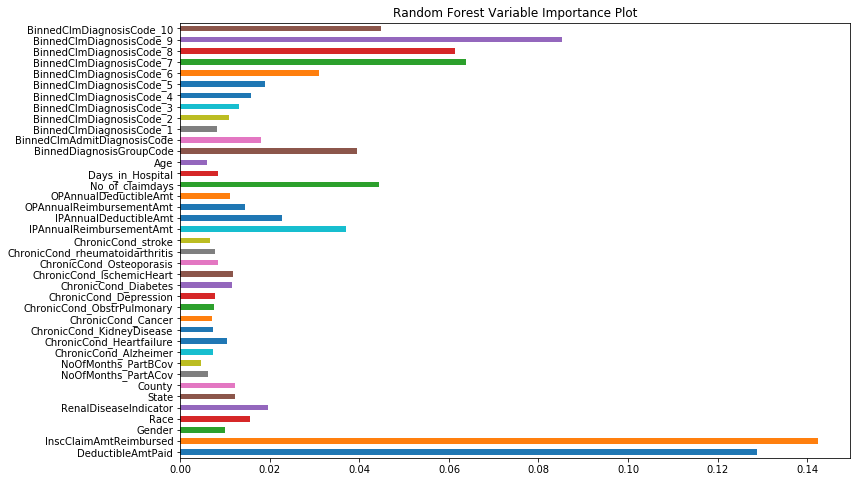

In [142]:
importances=pd.Series(rfclf.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))
plt.title("Random Forest Variable Importance Plot")

### Random Forest with GridSearch

In [143]:
from sklearn.model_selection import GridSearchCV
rfc= RandomForestClassifier(n_jobs=-1,max_features='sqrt')

## Use a grid over parameter of interest
param_grid={
            "n_estimators" : [50,80,100,150,200],
            "max_depth" : [3,5,8],
            "min_samples_leaf": [2,4]}
CV_rfc= GridSearchCV(estimator=rfc,param_grid=param_grid,cv=10)
CV_rfc.fit(X=X_train,y=y_train)
print(CV_rfc.best_score_,CV_rfc.best_params_)

0.929757343550447 {'max_depth': 8, 'min_samples_leaf': 2, 'n_estimators': 150}


In [144]:
x_pred4=CV_rfc.predict(X_train)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_train,x_pred4))
print(classification_report(y_train,x_pred4,digits=4))

0.9528735632183908
              precision    recall  f1-score   support

          No     0.9831    0.9216    0.9514      3915
         Yes     0.9262    0.9842    0.9543      3915

   micro avg     0.9529    0.9529    0.9529      7830
   macro avg     0.9547    0.9529    0.9528      7830
weighted avg     0.9547    0.9529    0.9528      7830



In [145]:
y_pred4=CV_rfc.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test,y_pred4))
print(classification_report(y_test,y_pred4,digits=4))

0.8844731977818854
              precision    recall  f1-score   support

          No     0.9747    0.8969    0.9342       989
         Yes     0.4070    0.7527    0.5283        93

   micro avg     0.8845    0.8845    0.8845      1082
   macro avg     0.6909    0.8248    0.7312      1082
weighted avg     0.9259    0.8845    0.8993      1082



### Naive-Bayes

In [146]:
from sklearn.naive_bayes import GaussianNB

In [147]:
nbclf = GaussianNB()
nbclf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [148]:
x_pred5 = nbclf.predict(X_train)
print(accuracy_score(y_train, x_pred5))
print(classification_report(y_train,x_pred5,digits=4))

0.7241379310344828
              precision    recall  f1-score   support

          No     0.6547    0.9487    0.7747      3915
         Yes     0.9068    0.4996    0.6443      3915

   micro avg     0.7241    0.7241    0.7241      7830
   macro avg     0.7807    0.7241    0.7095      7830
weighted avg     0.7807    0.7241    0.7095      7830



In [149]:
y_pred5 = nbclf.predict(X_test)
print(accuracy_score(y_test,y_pred5))
print(classification_report(y_test,y_pred5,digits=4))

0.9131238447319778
              precision    recall  f1-score   support

          No     0.9552    0.9494    0.9523       989
         Yes     0.4949    0.5269    0.5104        93

   micro avg     0.9131    0.9131    0.9131      1082
   macro avg     0.7251    0.7382    0.7314      1082
weighted avg     0.9157    0.9131    0.9143      1082



### Decision Tree

In [150]:
from sklearn.tree import DecisionTreeClassifier

In [151]:
dtclf=DecisionTreeClassifier(max_depth=8,max_features='sqrt',class_weight="balanced")

In [152]:
%time model = dtclf.fit(X_train, y_train)

Wall time: 44 ms


In [153]:
x_pred6= dtclf.predict(X_train)
print(accuracy_score(y_train, x_pred6))
print(classification_report(y_train,x_pred6,digits=4))

0.9288633461047254
              precision    recall  f1-score   support

          No     0.9773    0.8782    0.9251      3915
         Yes     0.8894    0.9796    0.9323      3915

   micro avg     0.9289    0.9289    0.9289      7830
   macro avg     0.9333    0.9289    0.9287      7830
weighted avg     0.9333    0.9289    0.9287      7830



In [154]:
y_pred6 = dtclf.predict(X_test)
print(accuracy_score(y_test,y_pred6))
print(classification_report(y_test,y_pred6,digits=4))

0.8438077634011091
              precision    recall  f1-score   support

          No     0.9756    0.8504    0.9087       989
         Yes     0.3273    0.7742    0.4601        93

   micro avg     0.8438    0.8438    0.8438      1082
   macro avg     0.6515    0.8123    0.6844      1082
weighted avg     0.9199    0.8438    0.8701      1082



### XGB

In [155]:
from xgboost import XGBClassifier
XGB = XGBClassifier(colsample_bytree=0.5,n_estimators=230,booster='gbtree',max_depth=3)

In [156]:
%time XGB.fit(X_train, y_train)

Wall time: 1.68 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=230,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [157]:
x_pred7 = XGB.predict(X_train)
print(accuracy_score(y_train,x_pred7))
print(classification_report(y_train,x_pred7,digits=4))

0.958109833971903
              precision    recall  f1-score   support

          No     0.9833    0.9321    0.9570      3915
         Yes     0.9354    0.9842    0.9592      3915

   micro avg     0.9581    0.9581    0.9581      7830
   macro avg     0.9594    0.9581    0.9581      7830
weighted avg     0.9594    0.9581    0.9581      7830



In [158]:
y_pred7 = XGB.predict(X_test)
print(accuracy_score(y_test, y_pred7))
print(classification_report(y_test,y_pred7,digits=4))

0.8918669131238447
              precision    recall  f1-score   support

          No     0.9708    0.9090    0.9389       989
         Yes     0.4231    0.7097    0.5301        93

   micro avg     0.8919    0.8919    0.8919      1082
   macro avg     0.6970    0.8093    0.7345      1082
weighted avg     0.9238    0.8919    0.9038      1082



### XGB with Grid Search

In [159]:
from sklearn.model_selection import GridSearchCV
XGB = XGBClassifier(n_jobs=-1)
 
# Use a grid over parameters of interest
param_grid = {
     'colsample_bytree': np.linspace(0.5, 0.9, 5),
     'n_estimators':[200,500],
     'max_depth': [15]
}

 
CV_XGB = GridSearchCV(estimator=XGB, param_grid=param_grid, cv=3)

In [160]:
%time CV_XGB.fit(X=X_train, y=y_train)

Wall time: 3min 54s


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9]), 'n_estimators': [200, 500], 'max_depth': [15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [161]:
print(CV_XGB.best_score_,CV_XGB.best_params_)

0.9565772669220945 {'colsample_bytree': 0.6, 'max_depth': 15, 'n_estimators': 500}


In [162]:
x_pred8 = CV_XGB.predict(X_train)
print(accuracy_score(y_train,x_pred8))
print(classification_report(y_train,x_pred8,digits=4))

1.0
              precision    recall  f1-score   support

          No     1.0000    1.0000    1.0000      3915
         Yes     1.0000    1.0000    1.0000      3915

   micro avg     1.0000    1.0000    1.0000      7830
   macro avg     1.0000    1.0000    1.0000      7830
weighted avg     1.0000    1.0000    1.0000      7830



In [163]:
y_pred8 = CV_XGB.predict(X_test)
print(accuracy_score(y_test, y_pred8))
print(classification_report(y_test,y_pred8,digits=4))

0.910351201478743
              precision    recall  f1-score   support

          No     0.9627    0.9383    0.9503       989
         Yes     0.4831    0.6129    0.5403        93

   micro avg     0.9104    0.9104    0.9104      1082
   macro avg     0.7229    0.7756    0.7453      1082
weighted avg     0.9214    0.9104    0.9151      1082



### Stacked Model 

In [164]:
train_pred1=pd.DataFrame(x_pred1)
test_pred1= pd.DataFrame(y_pred1)

In [165]:
test_pred1.columns = ['lgpred']
train_pred1.columns = ['lgpred']
test_pred1.tail(5)

,lgpred
1077,No
1078,No
1079,Yes
1080,No
1081,No


In [166]:
train_pred2=pd.DataFrame(x_pred2)
test_pred2= pd.DataFrame(y_pred2)

In [167]:
test_pred2.columns = ['svmpred']
train_pred2.columns = ['svmpred']
test_pred2.tail(5)

,svmpred
1077,No
1078,No
1079,Yes
1080,No
1081,No


In [168]:
train_pred3=pd.DataFrame(x_pred3)
test_pred3= pd.DataFrame(y_pred3)

In [169]:
train_pred3.columns = ['rfpred']
test_pred3.columns = ['rfpred']
train_pred3.tail(5)

,rfpred
7825,Yes
7826,Yes
7827,Yes
7828,Yes
7829,Yes


In [170]:
train_pred4=pd.DataFrame(x_pred5)
test_pred4= pd.DataFrame(y_pred5)

In [171]:
test_pred4.columns = ['nbpred']
train_pred4.columns = ['nbpred']
test_pred4.tail(5)

,nbpred
1077,No
1078,No
1079,No
1080,No
1081,No


In [172]:
train_pred5=pd.DataFrame(x_pred6)
test_pred5= pd.DataFrame(y_pred6)

In [173]:
test_pred5.columns = ['dtpred']
train_pred5.columns = ['dtpred']
test_pred5.tail(5)

,dtpred
1077,No
1078,No
1079,No
1080,No
1081,No


In [174]:
train_pred6=pd.DataFrame(x_pred7)
test_pred6= pd.DataFrame(y_pred7)

In [175]:
test_pred6.columns = ['XGBMpred']
train_pred6.columns = ['XGBMpred']
test_pred6.tail(5)

,XGBMpred
1077,No
1078,No
1079,No
1080,No
1081,No


In [176]:
df_train =pd.concat([train_pred1,train_pred2,train_pred3,train_pred4,train_pred5,train_pred6],axis=1)
df_test = pd.concat([test_pred1,test_pred2,test_pred3,test_pred4,test_pred5,test_pred6],axis=1)

In [177]:
df_train.tail()

,lgpred,svmpred,rfpred,nbpred,dtpred,XGBMpred
7825,Yes,Yes,Yes,Yes,Yes,Yes
7826,No,No,Yes,No,Yes,Yes
7827,No,No,Yes,No,Yes,Yes
7828,Yes,Yes,Yes,Yes,Yes,Yes
7829,Yes,Yes,Yes,Yes,Yes,Yes


In [178]:
cat_cols = ['lgpred','svmpred','rfpred','nbpred','dtpred','XGBMpred']

In [179]:
for i in cat_cols:
    df_train[i] = df_train[i].astype('category')

In [180]:
df_train.dtypes

lgpred      category
svmpred     category
rfpred      category
nbpred      category
dtpred      category
XGBMpred    category
dtype: object

In [181]:
for i in cat_cols:
    df_test[i] = df_test[i].astype('category')

In [182]:
le=preprocessing.LabelEncoder()
lis=['lgpred','svmpred','rfpred','nbpred','dtpred','XGBMpred']

In [183]:
for i in cat_cols:
    le.fit(df_train[i])
    df_train[i]=le.fit_transform(df_train[i])

In [184]:
for i in cat_cols:
    le.fit(df_test[i])
    df_test[i]=le.fit_transform(df_test[i])

In [185]:
from sklearn.linear_model import LogisticRegression
stmodel = LogisticRegression()

In [186]:
stmodel.fit(df_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [187]:
y_pred8 = stmodel.predict(df_test)
x_pred8= stmodel.predict(df_train)

In [188]:
x_pred9= stmodel.predict(df_train)
print(accuracy_score(y_train, x_pred9))
print(classification_report(y_train,x_pred9,digits=4))

0.9767560664112388
              precision    recall  f1-score   support

          No     0.9995    0.9540    0.9762      3915
         Yes     0.9560    0.9995    0.9773      3915

   micro avg     0.9768    0.9768    0.9768      7830
   macro avg     0.9777    0.9768    0.9767      7830
weighted avg     0.9777    0.9768    0.9767      7830



In [189]:
y_pred9 = stmodel.predict(df_test)
print(accuracy_score(y_test,y_pred9))
print(classification_report(y_test,y_pred9,digits=4))

0.8909426987060998
              precision    recall  f1-score   support

          No     0.9708    0.9080    0.9383       989
         Yes     0.4204    0.7097    0.5280        93

   micro avg     0.8909    0.8909    0.8909      1082
   macro avg     0.6956    0.8088    0.7332      1082
weighted avg     0.9235    0.8909    0.9031      1082

